## Titanic Classification: Use logistic regression to predict if a passenger survived.

1. Importing packages and libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

2. Loading the dataset from seaborn library

In [3]:
titanic= sns.load_dataset('titanic')


3. Cleaning the dataSet

In [4]:
titanic.drop(['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class'], axis=1, inplace=True)

# Drop rows with missing values (simple cleaning)
titanic.dropna(inplace=True)

# Encode categorical variables
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# View cleaned data
print(titanic.head())

   survived  pclass  sex   age  sibsp  parch     fare  embarked  alone
0         0       3    0  22.0      1      0   7.2500         0  False
1         1       1    1  38.0      1      0  71.2833         1  False
2         1       3    1  26.0      0      0   7.9250         0   True
3         1       1    1  35.0      1      0  53.1000         0  False
4         0       3    0  35.0      0      0   8.0500         0   True


4. Training the dataset

In [8]:
X=titanic.drop('survived',axis=1)
y=titanic['survived']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

5. Training the Model

In [9]:
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


6. Printing the results

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7692307692307693
Confusion Matrix:n [[69 11]
 [22 41]]


7. Visual Representation

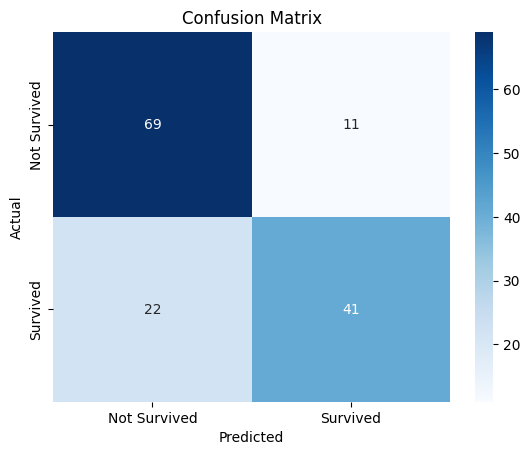

In [11]:


# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


8. short interpretation of their findings

- Positive coefficients → increase in survival probability.

- Negative coefficients → decrease in survival probability.

- Larger absolute values → more influence on prediction.